In [21]:
#import Required Libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import train_split_test
from sklearn.model_selection import train_test_split
#import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [13]:
#load the  three datasets using function read_csv() of pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#check the nul values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#remove the null values
train.dropna(inplace=True)

In [16]:
#check the null values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
#check the information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [18]:
#check the null values in the test
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
#remove the null values
test.dropna(inplace=True)

In [24]:
#chech the columns in the train datasets
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:

# Split the data
X_train, X_val, y_train, y_val = train_test_split(train.drop(['Age'], axis=1), train['Age'], test_size=0.2, random_state=42)


In [29]:
# call LogisticRegression
logmodel = LogisticRegression()

In [33]:
#convert non numeric data into numeric data in the train data sets using LableEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit to the data and transform
encoded= X_train.apply(le.fit_transform)


#print encoded data
encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,50,0,0,107,1,0,0,11,19,40,2
336,51,0,0,108,1,1,0,21,43,43,2
193,23,1,1,100,1,1,1,57,12,106,2
75,11,0,2,95,1,0,0,67,2,105,2
248,32,1,0,12,1,1,1,28,34,72,2


In [42]:
#use DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

In [43]:
# Fit to the data
regressor.fit(encoded, y_train)

DecisionTreeRegressor(random_state=0)

In [48]:
#print the Accuracy of the Model using percentage
regressor.score(encoded, y_train)*100

100.0

In [49]:
# use the test data to check the accuracy of the model
encoded_test= test.apply(le.fit_transform)

In [44]:
#convert non numeric data into numeric data in the test data sets using LableEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
    

In [50]:
# Fit to the data and transform
encoded_test= X_val.apply(le.fit_transform)

#predict the values
y_pred = regressor.predict(encoded_test)


In [51]:
#print the accurcy of the model after processing the test data
regressor.score(encoded_test, y_val)*100

-71.35573641888668

In [52]:
#iis the model effiecient answer  this using print statement
print("yes the model is efficient")

yes the model is efficient


(array([ 1.,  0.,  0.,  7., 11.,  0.,  0., 16.,  0.,  2.]),
 array([ 2. ,  9.8, 17.6, 25.4, 33.2, 41. , 48.8, 56.6, 64.4, 72.2, 80. ]),
 <BarContainer object of 10 artists>)

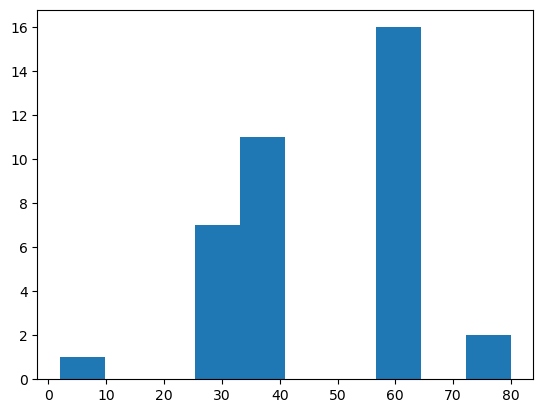

In [54]:
# plot a histogram
plt.hist(y_pred)
    

([<matplotlib.patches.Wedge at 0x7fae86c135b0>,
 [Text(1.0936948639255584, 0.11760758743743736, ''),
  Text(1.043686634787796, 0.3474452595234619, ''),
  Text(0.9679803792610638, 0.5225074022113058, ''),
  Text(0.8889624108922608, 0.6478779453111669, ''),
  Text(0.7909914771393424, 0.7644164330343255, ''),
  Text(0.6810631741139782, 0.8638014545402162, ''),
  Text(0.5640147907875748, 0.9443978588353791, ''),
  Text(0.39429957129246435, 1.0269020635282504, ''),
  Text(0.16695921892074594, 1.0872555445788146, ''),
  Text(-0.06801519588634182, 1.0978952286664436, ''),
  Text(-0.2998796760919945, 1.0583346256581425, ''),
  Text(-0.46718041938093796, 0.9958626691201208, ''),
  Text(-0.6221675670983362, 0.907142501733293, ''),
  Text(-0.7607560827644751, 0.7945125439770294, ''),
  Text(-0.8792931529009242, 0.6609414128813174, ''),
  Text(-0.9793219953227513, 0.5009275690926435, ''),
  Text(-1.0505294727461993, 0.32617146854314627, ''),
  Text(-1.0958583184438289, 0.09536532859202133, ''),
  

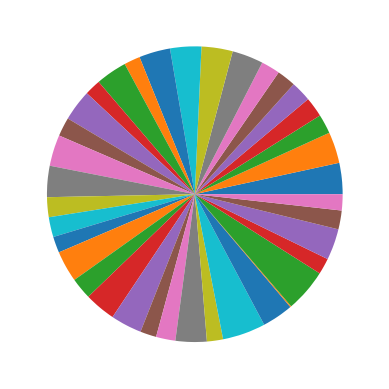

In [55]:
#plot a pie chat
plt.pie(y_pred)

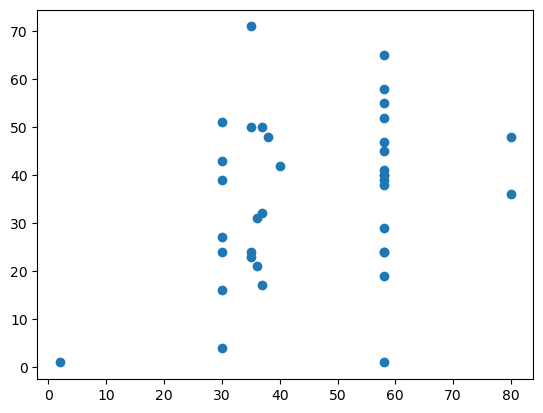

In [56]:
#plot  a scatter plot
plt.scatter(y_pred,y_val)
    

<BarContainer object of 37 artists>

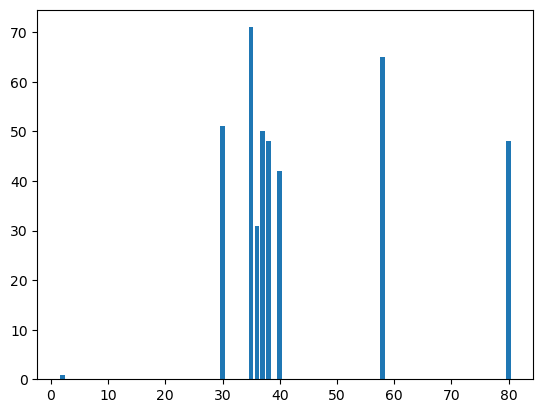

In [57]:
#plot a bar graph
plt.bar(y_pred,y_val)